In [1]:
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation
import seaborn as sns
import numpy as np

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from keras.utils import np_utils 



import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop



Using TensorFlow backend.


We are running tensorflow through keras. I cannot get the swiss/swedish/norwegian roll to perform accurately at all. It does not pick up the structure even when I expand the input features to include sin(x), sin(y), x*y, x**2, and y**2. The loss functions do not go down monotonically in our example. There are jumps in the loss functions for test and training data. 

The learning rate effects how quickly it settles in on a pattern. When the learning rate is large the model 'settles down' quickly, but misses the pattern (when the pattern is more complex). A small learning rate the model more slowly improves the loss function, but seems to find the pattern.

The epoch seems to be the number of iterations the model goes through. 

SGD refers to stochastic gradient descent. Adam, ' adaptive moment estimation' is an alternative which can be faster I read. 

Adding nodes and layers slows down our models, but in the more complex patterns I looked at helped to find the pattern.

I've included some of our code below along side an exploration of the MNIST dataset. We went a little off script for this lab, but it was easier to adapt some of the excersies to python than others. 

I could get the swiss roll neural net in tensor flow playground to work, but could not achieve anything close to accurate when I coded it up myself. 

*note, I am also using http://playground.tensorflow.org to explore the models. 


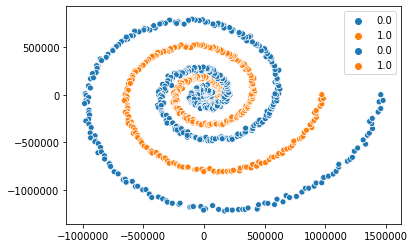

In [2]:

XTrain_spiral = []
YTrain_spiral = []
for theta in np.linspace(0,10*np.pi, num = 1000):
    r = ((theta)**4)
    XTrain_spiral.append(r*np.cos(theta) + 100*np.random.normal(0, 100, 1) ) 
    YTrain_spiral.append(r*np.sin(theta) + 100*np.random.normal(0, 100, 1))


XTrain_spiral = np.reshape(XTrain_spiral, 1000)
YTrain_spiral = np.reshape(YTrain_spiral, 1000)

x = np.concatenate([XTrain_spiral,1.5*XTrain_spiral])
y = np.concatenate([YTrain_spiral, 1.5*YTrain_spiral])
cl = (np.concatenate([np.ones(1000), np.zeros(1000)]))

sns.scatterplot(x,y,hue = cl)  

#cl = np_utils.to_categorical(cl)
data = np.vstack([x,y]).T
#sns.scatterplot(x,y,hue = cl[:,1])  
sns.scatterplot(x,y,hue = cl)  

#now build neural net


train_X, test_X, train_y, test_y = train_test_split(data, cl, 
                                                    train_size=0.5,
                                                    test_size=0.5)

The first model is a classification model

In [3]:

model = Sequential()
model.add(Dense(8, activation='tanh', kernel_initializer='random_normal', input_shape=(2,)))
model.add(Dense(8, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))


In [4]:
model.summary()

model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

model.fit(train_X, train_y,
          epochs=100,
          batch_size=128, verbose = 0)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


Now I can plot the neural net predictions.

1000/1000 [==============================] - 0s 29us/step


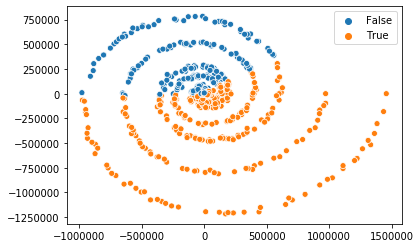

In [5]:
score = model.evaluate(test_X, test_y, batch_size=128)
score
predict = model.predict(test_X)

y_pred=model.predict(test_X)
y_pred =(y_pred>0.5)

sns.scatterplot(test_X[:,0], test_X[:,1], hue =y_pred[:,0])  

In [6]:
model.summary()

model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

model.fit(train_X, train_y,
          epochs=1000,
          batch_size=128, verbose = 0)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


1000/1000 [==============================] - 0s 27us/step


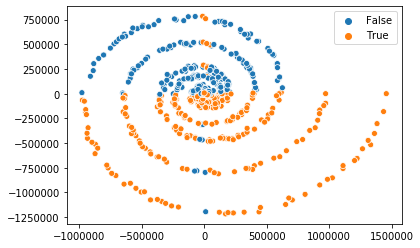

In [7]:
score = model.evaluate(test_X, test_y, batch_size=128)
score
predict = model.predict(test_X)

y_pred=model.predict(test_X)
y_pred =(y_pred>0.5)

sns.scatterplot(test_X[:,0], test_X[:,1], hue =y_pred[:,0])  


In [8]:
print(score)

[0.7016984400749207, 0.47699999809265137]


So clearly our neural net for the swiss/swedith/german roll is not working very well. I am going to try a basis expansion and see if that helps, since we clearly do not have a linear decision boundary. 

In [9]:
data = np.vstack([x,y,x**2,y**2, x*y, np.sin(x), np.sin(y)]).T


train_X, test_X, train_y, test_y = train_test_split(data, cl, 
                                                    train_size=0.5,
                                                    test_size=0.5)

print(data[:1])
print(cl)

[[ 2.02748768e+04  2.05975954e+03  4.11070630e+08  4.24260937e+06
   4.17613710e+07 -8.20427413e-01 -9.02371080e-01]]
[1. 1. 1. ... 0. 0. 0.]


In [10]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(7,)))
model.add(Dropout(0.1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [11]:

adam = keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, amsgrad=False)


model.compile(optimizer = adam, loss='binary_crossentropy')


model.fit(train_X, train_y,
          epochs=100,
          batch_size=128, verbose = 0)

1000/1000 [==============================] - 0s 32us/step


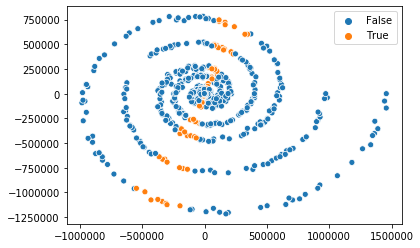

In [12]:
score = model.evaluate(test_X, test_y, batch_size=128)
score
predict = model.predict(test_X)

y_pred=model.predict(test_X)
#print(y_pred)
y_pred =(y_pred>0.5)

sns.scatterplot(test_X[:,0], test_X[:,1], hue =y_pred[:,0]) 

The following is different than the class assignment, but seemed relevant. Plus I found documentation on Keras for the MNIST dataset so I am more confident the activations I am using are appropriate.

In [13]:

#''Trains a simple deep NN on the MNIST dataset.

#Gets to 98.40% test accuracy after 20 epochs
#(there is *a lot* of margin for parameter tuning).
#2 seconds per epoch on a K520 GPU.
#''


batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [=